Loading and sectioning Data

In [152]:
import scipy.io
import mat73
import numpy as np
loc=np.load("D:/locations.npy")
data_dict=mat73.loadmat("D:/vi.mat")
print("Data loading completed")
data=data_dict['vi']
x_temp=[]
print("segregation inti......")
for i in range(len(loc)):
    
    temp=data[:,loc[i][0]:loc[i][1]+1]
    sh=np.shape(temp)
    i,j=0,0
    while i<=sh[0] and j<=sh[1]:
        x_temp.append(temp[i:i+128,j:j+128])
        i+=128
        j+=128

Data loading completed
segregation inti......


In [ ]:
import matplotlib.pyplot as plt
print(loc)
plt.plot(loc)
plt.show()


In [112]:
x_t=[]
for i in x_temp:
    if np.shape(i)==(128,128):
        x_t.append(i)

In [115]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler=MinMaxScaler()
data=[]
for i in x_t:
    data.append(scaler.fit_transform(i))

X_train,X_test,y_train,y_test=train_test_split(data,data,test_size=0.1,random_state=42)

In [116]:
del data_dict
del loc
del data
del x_temp
del temp
del y_train
del y_test

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.signal import fft2d, ifft2d
from tensorflow.keras.utils import plot_model
#import spconv.pytorch as spconv

Original Unet_FFT

In [ ]:
inputs = tf.keras.layers.Input((128,128,1))

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
f1 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(p1)
f1 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f1)
print(p1.shape)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(abs(f1))
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
f2 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(p2)
f2 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f2)
print(p2.shape)


c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(abs(f2))
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
f3 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(p3)
f3 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f3)
print(p3.shape)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(abs(f3))
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
f4 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(p4)
f4 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f4)
print(p4.shape)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(abs(f4))
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c5)
print(c5.shape)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
print(u6.shape)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
f6 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(c6)
f6 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(abs(f6))
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
f7 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(c7)
f7 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(abs(f7))
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
f8 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(c8)
f8 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(abs(f8))
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

In [ ]:
model.save('Unet_fft.h5')

Unet_R_FFT

In [145]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class FFTLayer(Layer):
    def __init__(self, **kwargs):
        super(FFTLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.R = self.add_weight(
            shape=(1, input_shape[1], input_shape[2], 1),
            initializer='ones',
            trainable=True,
            dtype=tf.complex64,
            name='R'
        )
        super(FFTLayer, self).build(input_shape)

    def call(self, x):
        fft_result = tf.signal.fft2d(tf.cast(x, tf.complex64))
        fft_result = fft_result * self.R[:, :tf.shape(fft_result)[1], :tf.shape(fft_result)[2], :]
        return tf.signal.ifft2d(tf.cast(fft_result, tf.complex64))

# Create FFT layer instance
fft_layer = FFTLayer()

# Example usage
inputs = tf.keras.layers.Input((128, 128, 1))

# Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(inputs)
c1 = tf.keras.layers.Dropout(0.2)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
f1 = fft_layer(p1)
print(p1.shape)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(abs(f1))
c2 = tf.keras.layers.Dropout(0.2)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
f2 = fft_layer(p2)
print(p2.shape)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(abs(f2))
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
f3 = fft_layer(p3)
print(p3.shape)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(abs(f3))
c4 = tf.keras.layers.Dropout(0.3)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
f4 = fft_layer(p4)
print(p4.shape)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(abs(f4))
c5 = tf.keras.layers.Dropout(0.2)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c5)
print(c5.shape)

# Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.3)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
f6 = fft_layer(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(abs(f6))
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.3)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
f7 = fft_layer(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(abs(f7))
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.3)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
f8 = fft_layer(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(abs(f8))
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.2)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()


(None, 64, 64, 16)
(None, 32, 32, 32)
(None, 16, 16, 64)
(None, 8, 8, 128)
(None, 8, 8, 256)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_38 (Conv2D)          (None, 128, 128, 16)         160       ['input_3[0][0]']             
                                                                                                  
 dropout_18 (Dropout)        (None, 128, 128, 16)         0         ['conv2d_38[0][0]']           
                                                                                                  
 conv2d_39 (Conv2D)          (None, 128, 128, 16)         2320      ['dropout_18[0][0]']          

Unet_fft_R with L1 norm and BN

In [165]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Conv2D, Dropout, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.layers import GroupNormalization as GN
from tensorflow.keras.regularizers import l1


class CombinedLoss(tf.keras.losses.Loss):
    def __init__(self, mse_weight=1.0, fft_weight=1.0, name='combined_loss', **kwargs):
        super(CombinedLoss, self).__init__(name=name, **kwargs)
        self.mse_weight = mse_weight
        self.fft_weight = fft_weight

    def mse_loss(self, y_true, y_pred):
        return tf.keras.losses.MeanSquaredError()(y_true, y_pred)

    def fft_loss(self, y_true, y_pred):
        actual_fft = tf.signal.rfft2d(tf.cast(y_true, tf.complex64))
        pred_fft = tf.signal.rfft2d(tf.cast(y_pred, tf.complex64))
        return tf.math.real(tf.math.reduce_mean(tf.math.square(actual_fft - pred_fft)))

    def call(self, y_true, y_pred):
        mse_loss = self.mse_loss(y_true, y_pred)
        fft_loss = self.fft_loss(y_true, y_pred)

        combined_loss = self.mse_weight * mse_loss + self.fft_weight * fft_loss

        return combined_loss

class FFTLayer(Layer):
    def __init__(self, **kwargs):
        super(FFTLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Use a real-valued initializer for the weights
        real_initializer = tf.keras.initializers.glorot_normal()

        # Initialize real and imaginary parts separately
        real_part = real_initializer(shape=(1, input_shape[1], input_shape[2], 1))
        imag_part = real_initializer(shape=(1, input_shape[1], input_shape[2], 1))

        # Combine real and imaginary parts into complex weights
        self.R = tf.complex(real_part, imag_part)

        super(FFTLayer, self).build(input_shape)

    def call(self, x):
        fft_result = tf.signal.fft2d(tf.cast(x, tf.complex64))
        fft_result = fft_result * self.R[:, :tf.shape(fft_result)[1], :tf.shape(fft_result)[2], :]
        return tf.signal.ifft2d(tf.cast(fft_result, tf.complex64))

# L1    
l1_strength=1e-4

# Create FFT layer instance
fft_layer = FFTLayer()

# Example usage
inputs = Input((128, 128, 1))

# Contraction path
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(inputs)
c1 = GN(groups=16)(c1)
c1 = Dropout(0.2)(c1)
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c1)
c1 = GN(groups=16)(c1)
p1 = MaxPooling2D((2, 2))(c1)
f1 = fft_layer(p1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(abs(f1))
c2 = GN(groups=32)(c2)
c2 = Dropout(0.2)(c2)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c2)
c2 = GN(groups=32)(c2)
p2 = MaxPooling2D((2, 2))(c2)
f2 = fft_layer(p2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(abs(f2))
c3 = GN(groups=64)(c3)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c3)
c3 = GN(groups=64)(c3)
p3 = MaxPooling2D((2, 2))(c3)
f3 = fft_layer(p3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(abs(f3))
c4 = GN(groups=128)(c4)
c4 = Dropout(0.3)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c4)
c4 = GN(groups=128)(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)
f4 = fft_layer(p4)

c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(abs(f4))
c5 = Dropout(0.2)(c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c5)

# Expansive path
u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(u6)
c6 = Dropout(0.3)(c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c6)
f6 = fft_layer(c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(abs(f6))
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(u7)
c7 = GN(groups=64)(c7)
c7 = Dropout(0.3)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c7)
c7 = GN(groups=64)(c7)
f7 = fft_layer(c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(abs(f7))
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(u8)
c8 = GN(groups=32)(c8)
c8 = Dropout(0.3)(c8)
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c8)
c8 = GN(groups=32)(c8)
f8 = fft_layer(c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(abs(f8))
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(u9)
c9 = Dropout(0.2)(c9)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

combined_loss = CombinedLoss(mse_weight=1.0, fft_weight=0.5)
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss=combined_loss, metrics=['accuracy'])
model.summary()

ValueError: Expected floating point type, got <dtype: 'complex64'>.

Train with custom FFt Layer

combined Loss (Fourier and mse) + GN

In [162]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Conv2D, Dropout, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.layers import GroupNormalization as GN
from tensorflow.keras.regularizers import l1

class CombinedLoss(tf.keras.losses.Loss):
    def __init__(self, mse_weight=1.0, fft_weight=1.0, name='combined_loss', **kwargs):
        super(CombinedLoss, self).__init__(name=name, **kwargs)
        self.mse_weight = mse_weight
        self.fft_weight = fft_weight

    def mse_loss(self, y_true, y_pred):
        return tf.keras.losses.MeanSquaredError()(y_true, y_pred)

    def fft_loss(self, y_true, y_pred):
        actual_fft = tf.signal.rfft2d(y_true)
        pred_fft = tf.signal.rfft2d(y_pred)
        return tf.math.real(tf.math.reduce_mean(tf.math.square(actual_fft - pred_fft)))

    def call(self, y_true, y_pred):
        mse_loss = self.mse_loss(y_true, y_pred)
        fft_loss = self.fft_loss(y_true, y_pred)

        combined_loss = self.mse_weight * mse_loss + self.fft_weight * fft_loss

        return combined_loss


class FFTLayer(Layer):
    def __init__(self, **kwargs):
        super(FFTLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.R = self.add_weight(
            shape=(1, input_shape[1], input_shape[2], 1),
            initializer='ones',
            trainable=True,
            dtype=tf.complex64,
            name='R'
        )
        super(FFTLayer, self).build(input_shape)

    def call(self, x):
        fft_result = tf.signal.fft2d(tf.cast(x, tf.complex64))
        fft_result = fft_result * self.R[:, :tf.shape(fft_result)[1], :tf.shape(fft_result)[2], :]
        return tf.signal.ifft2d(tf.cast(fft_result, tf.complex64))
# L1    
l1_strength=1e-4

# Create FFT layer instance
fft_layer = FFTLayer()

# Example usage
inputs = Input((128, 128, 1))

# Contraction path
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(inputs)
c1 = GN(groups=16)(c1)
c1 = Dropout(0.2)(c1)
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c1)
c1 = GN(groups=16)(c1)
p1 = MaxPooling2D((2, 2))(c1)
f1 = fft_layer(p1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(abs(f1))
c2 = GN(groups=32)(c2)
c2 = Dropout(0.2)(c2)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c2)
c2 = GN(groups=32)(c2)
p2 = MaxPooling2D((2, 2))(c2)
f2 = fft_layer(p2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(abs(f2))
c3 = GN(groups=64)(c3)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c3)
c3 = GN(groups=64)(c3)
p3 = MaxPooling2D((2, 2))(c3)
f3 = fft_layer(p3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(abs(f3))
c4 = GN(groups=128)(c4)
c4 = Dropout(0.3)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c4)
c4 = GN(groups=128)(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)
f4 = fft_layer(p4)

c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(abs(f4))
c5 = Dropout(0.2)(c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c5)

# Expansive path
u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(u6)
c6 = Dropout(0.3)(c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c6)
f6 = fft_layer(c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(abs(f6))
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(u7)
c7 = GN(groups=64)(c7)
c7 = Dropout(0.3)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c7)
c7 = GN(groups=64)(c7)
f7 = fft_layer(c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(abs(f7))
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(u8)
c8 = GN(groups=32)(c8)
c8 = Dropout(0.3)(c8)
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c8)
c8 = GN(groups=32)(c8)
f8 = fft_layer(c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(abs(f8))
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(u9)
c9 = Dropout(0.2)(c9)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', kernel_regularizer=l1(l1_strength))(c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

combined_loss = CombinedLoss(mse_weight=0.7, fft_weight=0.3)
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss=combined_loss, metrics=['accuracy'])
model.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_136 (Conv2D)         (None, 128, 128, 16)         160       ['input_10[0][0]']            
                                                                                                  
 group_normalization_27 (Gr  (None, 128, 128, 16)         32        ['conv2d_136[0][0]']          
 oupNormalization)                                                                                
                                                                                                  
 dropout_64 (Dropout)        (None, 128, 128, 16)         0         ['group_normalization_27

In [164]:
history=model.fit(tf.expand_dims(X_train, axis=-1),tf.expand_dims(X_train, axis=-1), epochs = 50)

Epoch 1/50
94/94 [==============================] - 94s 854ms/step - loss: -0.2934 - accuracy: 0.0133
Epoch 2/50
94/94 [==============================] - 80s 855ms/step - loss: -7.7301 - accuracy: 0.0087
Epoch 3/50
94/94 [==============================] - 80s 854ms/step - loss: -8.2414 - accuracy: 0.0086
Epoch 4/50
94/94 [==============================] - 80s 850ms/step - loss: -8.3838 - accuracy: 0.0086
Epoch 5/50
30/94 [========>.....................] - ETA: 55s - loss: -8.3974 - accuracy: 0.0087

KeyboardInterrupt: 

In [156]:
model.save('Unet_fft_R1_L1_BN.h5')

c:\Users\ryuga\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [119]:
import scipy.io
import mat73
import numpy as np
data_dict=mat73.loadmat("vi.mat")
loc=np.load("locations.npy")
print("Data loading completed")
data=data_dict['vi']

print("segregation inti......")
temp=data[:,loc[281][0]:loc[281][1]+1]



Data loading completed
segregation inti......


In [87]:
temp=data[:,loc[277][0]:loc[277][1]+1]

In [121]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler=MinMaxScaler()

x_temp = []

for i in range(5):  # Iterate twice for two sets along the rows
    for j in range(4):  # Iterate four times for four subsets along the columns
        x_temp.append(scaler.fit_transform(temp[i * 128:(i + 1) * 128, j * 128:(j + 1) * 128]))


In [96]:
x_temp=np.array(x_temp)
np.shape(x_temp)

(20, 128, 128)

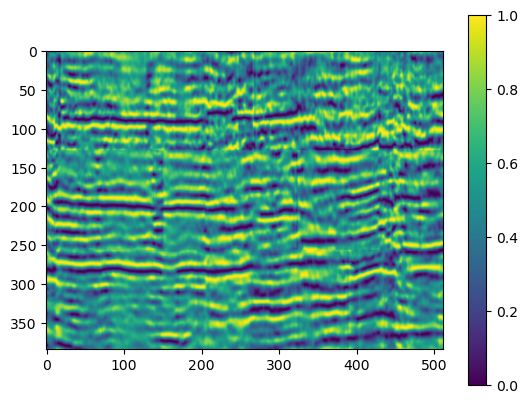

In [141]:
x_temp = []

for i in range(5):
    for j in range(4):
        # Fit and transform each subset
        x_temp.append(scaler.fit_transform(temp[i * 128:(i + 1) * 128, j * 128:(j + 1) * 128]))

# Concatenate subsets along columns in groups of 4
concatenated_columns = []
for i in range(0, len(x_temp), 4):
    concatenated_columns.append(np.concatenate(x_temp[i:i+4], axis=1))

# Concatenate the grouped columns to form the final image
final_image = np.concatenate(concatenated_columns, axis=0)

# Remove the first 128 rows and rows from 512 to the end
final_image = final_image[128:512, :]

# Plot the image
plt.imshow(final_image, cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:
Bigger version of the above

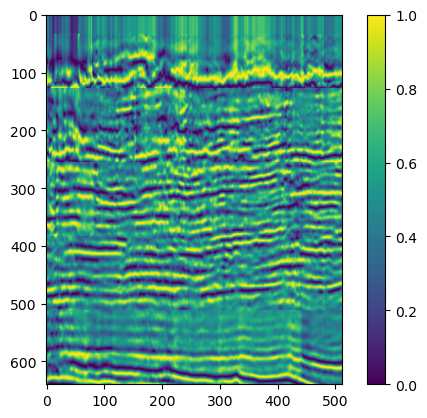

In [91]:
# Concatenate subsets along columns in groups of 4
concatenated_columns = []
for i in range(0, len(x_temp), 4):
    concatenated_columns.append(np.concatenate(x_temp[i:i+4], axis=1))

# Concatenate the grouped columns to form the final image
final_image = np.concatenate(concatenated_columns, axis=0)

# Plot the image
plt.imshow(final_image, cmap='viridis')
plt.colorbar()
plt.show()

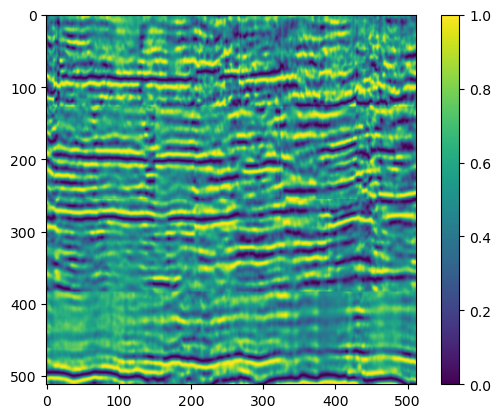

In [123]:
import matplotlib.pyplot as plt

# Remove the first row from the top
x_temp_modified = x_temp[4:]

# Concatenate the columns for each group
concatenated_columns = []
for i in range(0, len(x_temp_modified), 4):
    concatenated_columns.append(np.concatenate(x_temp_modified[i:i+4], axis=1))

# Concatenate the grouped columns to form the final image
final_image = np.concatenate(concatenated_columns, axis=0)

# Plot the image
plt.imshow(final_image, cmap='viridis')
plt.colorbar()
plt.show()


For each x_temp 1*128*128 perform prediction do for all x_temp 
x_temp=np.array(x_temp)
np.shape(x_temp)

Loading Unet fft

In [140]:
model_path = 'D:/Supriyo/onedrive/OneDrive - iitkgp.ac.in/Sanjay_unet/Unet_fft.h5'
# Load the model
loaded_model = tf.keras.models.load_model(model_path)

Loading Model Unet_r_FFT

In [130]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

# Define the FFTLayer class
class FFTLayer(Layer):
    def __init__(self, **kwargs):
        super(FFTLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.R = self.add_weight(
            shape=(1, input_shape[1], input_shape[2], 1),
            initializer='ones',
            trainable=True,
            dtype=tf.complex64,
            name='R'
        )
        super(FFTLayer, self).build(input_shape)

    def call(self, x):
        fft_result = tf.signal.fft2d(tf.cast(x, tf.complex64))
        fft_result = fft_result * self.R[:, :tf.shape(fft_result)[1], :tf.shape(fft_result)[2], :]
        return tf.signal.ifft2d(tf.cast(fft_result, tf.complex64))

# Create FFT layer instance
fft_layer = FFTLayer()

# Load the model with custom_objects parameter
model_path = 'D:/Supriyo/onedrive/OneDrive - iitkgp.ac.in/Sanjay_unet/Unet_fft_R1.h5'
loaded_model = tf.keras.models.load_model(model_path, custom_objects={'FFTLayer': FFTLayer})

# Now you can use the loaded_model for predictions or other tasks


Display Original Vs. Predicted Image

In [142]:

# Make predictions using the loaded model
predictions = loaded_model.predict(x_temp_array)

1/1 [==============================] - 1s 525ms/step


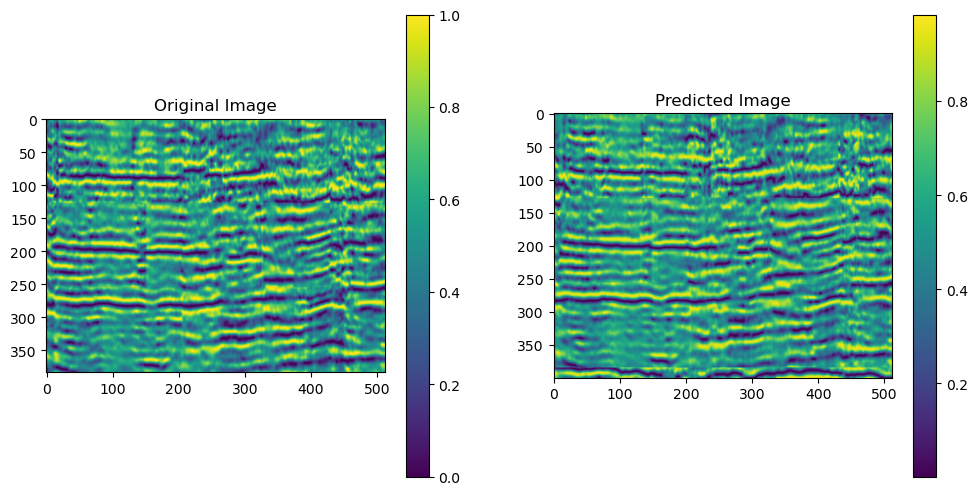

In [143]:

# Reshape predictions to the original shape of x_temp
predictions_reshaped = predictions.reshape(np.shape(x_temp))

# Remove the first row from the top of x_temp
x_temp_modified = x_temp[4:]

# Concatenate the columns for each group in x_temp_modified
concatenated_columns_original = []
for i in range(0, len(x_temp_modified), 4):
    concatenated_columns_original.append(np.concatenate(x_temp_modified[i:i+4], axis=1))

# Concatenate the grouped columns to form the final original image
final_image_original = np.concatenate(concatenated_columns_original, axis=0)
final_image_original = np.delete(final_image_original, np.arange(384, 512), axis=0)

# Concatenate the columns for each group in predictions_reshaped
concatenated_columns_predicted = []
for i in range(0, len(predictions_reshaped), 4):
    concatenated_columns_predicted.append(np.concatenate(predictions_reshaped[i:i+4], axis=1))

# Concatenate the grouped columns to form the final predicted image
final_image_predicted = np.concatenate(concatenated_columns_predicted, axis=0)
final_image_predicted  = np.delete(final_image_predicted, np.arange(512,624), axis=0)
final_image_predicted  = np.delete(final_image_predicted, np.arange(0, 128), axis=0)


# Plot original and predicted images in subplots
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(final_image_original, cmap='viridis')
plt.title('Original Image')
plt.colorbar()

# Predicted Image
plt.subplot(1, 2, 2)
plt.imshow(final_image_predicted, cmap='viridis')
plt.title('Predicted Image')
plt.colorbar()

plt.show()

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat

# Assuming final_image_original and final_image_predicted are defined

# Create a dictionary to store the images
mat_data = {
    'original_image': final_image_original,
    'predicted_image': final_image_predicted
}

# Specify the file path to save the .mat file
mat_file_path = 'images_dat2.mat'

# Save the data to a .mat file
savemat(mat_file_path, mat_data)

# Print a message indicating the successful saving
print(f'Data saved to {mat_file_path}')


Data saved to images_dat2.mat


In [45]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.layers import Layer

class FFTLayer(Layer):
    def __init__(self, **kwargs):
        super(FFTLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.R = self.add_weight(
            shape=(1, input_shape[1], input_shape[2], 1),
            initializer='ones',
            trainable=True,
            dtype=tf.complex64,
            name='R'
        )
        super(FFTLayer, self).build(input_shape)

    def call(self, x):
        fft_result = tf.signal.fft2d(tf.cast(x, tf.complex64))
        fft_result = fft_result * self.R[:, :tf.shape(fft_result)[1], :tf.shape(fft_result)[2], :]
        return tf.signal.ifft2d(tf.cast(fft_result, tf.complex64))

# Load the model with custom layer mapping
loaded_model = load_model('Unet_fft_R.h5', custom_objects={'FFTLayer': FFTLayer})


In [93]:
# Convert the list of numpy arrays to a single numpy array
x_temp_array = np.concatenate(x_temp, axis=-1)

# Expand the dimensions
x_temp_tensor = tf.expand_dims(x_temp_array, axis=-1)

# Make predictions with the loaded model
pred = loaded_model.predict(x_temp_tensor)

# Display the shape of the predictions
print("Shape of predictions:", pred.shape)

ValueError: in user code:

    File "c:\Users\ryuga\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\ryuga\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ryuga\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\ryuga\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "c:\Users\ryuga\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\ryuga\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 128, 128, 1), found shape=(32, 2560, 1)


In [48]:
x_temp=np.array(x_temp)
pred=loaded_model.predict(tf.expand_dims(x_temp, axis=-1))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3828,) + inhomogeneous part.

In [49]:
# Convert the list of numpy arrays to a single numpy array
x_temp_array = np.concatenate(x_temp, axis=-1)

# Expand the dimensions
x_temp_tensor = tf.expand_dims(x_temp_array, axis=-1)

# Now you can use x_temp_tensor for prediction
pred = loaded_model.predict(x_temp_tensor)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 128 and the array at index 847 has size 105

In [ ]:
pred=np.reshape(pred,(4,128,128))

In [ ]:
import tensorflow as tf

class EcaLayer(tf.keras.layers.Layer):
    def __init__(self, k_size=3):
        super(EcaLayer, self).__init__()
        self.avg_pool = tf.keras.layers.GlobalAveragePooling2D(data_format='channels_last')
        self.conv = tf.keras.layers.Conv1D(1, kernel_size=k_size, padding='same', use_bias=False) 
        self.sigmoid = tf.keras.layers.Activation('sigmoid')

    def call(self, x):
        y = self.avg_pool(x)
        y = tf.expand_dims(y, axis=2)
        y = self.conv(y)
        y = tf.squeeze(y, axis=2)
        y = self.sigmoid(y)
        return x * tf.expand_dims(y, axis=-1)
    
inputs = tf.keras.layers.Input((128, 128, 1))


#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
f1 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(p1)
f1 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f1)
print(p1.shape)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c2)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = EcaLayer()(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c3)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = EcaLayer()(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

# Apply ECA to c4
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(abs(f3))
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = EcaLayer()(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
f4 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v, tf.complex64)))(p4)
f4 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v, tf.complex64)))(f4)

 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(abs(f4))
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c5)
print(c5.shape)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
print(u6.shape)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
f6 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(c6)
f6 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(abs(f6))
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
f7 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(c7)
f7 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(abs(f7))
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
f8 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(c8)
f8 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(abs(f8))
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

In [18]:
import torch
import torch.nn as nn

class h_sigmoid(nn.Module):
    def __init__(self, inplace=True):
        super(h_sigmoid, self).__init__()
        self.relu = nn.ReLU6(inplace=inplace)

    def forward(self, x):
        return self.relu(x + 3) / 6

class h_swish(nn.Module):
    def __init__(self, inplace=True):
        super(h_swish, self).__init__()
        self.sigmoid = h_sigmoid(inplace=inplace)

    def forward(self, x):
        return x * self.sigmoid(x)

class CoordAtt(nn.Module):
    def __init__(self, inp, oup, reduction=32):
        super(CoordAtt, self).__init__()
        self.pool_h = nn.AdaptiveAvgPool2d((None, 1))
        self.pool_w = nn.AdaptiveAvgPool2d((1, None))

        mip = max(8, inp // reduction)

        self.conv1 = nn.Conv2d(inp, mip, kernel_size=1, stride=1, padding=0)
        self.bn1 = nn.BatchNorm2d(mip)
        self.act = h_swish()
        
        self.conv_h = nn.Conv2d(mip, oup, kernel_size=1, stride=1, padding=0)
        self.conv_w = nn.Conv2d(mip, oup, kernel_size=1, stride=1, padding=0)
        

    def forward(self, x):
        identity = x
        
        n, c, h, w = x.size()
        x_h = self.pool_h(x)
        x_w = self.pool_w(x).permute(0, 1, 3, 2)

        y = torch.cat([x_h, x_w], dim=2)
        y = self.conv1(y)
        y = self.bn1(y)
        y = self.act(y) 
        
        x_h, x_w = torch.split(y, [h, w], dim=2)
        x_w = x_w.permute(0, 1, 3, 2)

        a_h = self.conv_h(x_h).sigmoid()
        a_w = self.conv_w(x_w).sigmoid()

        out = identity * a_w * a_h

        return out

class EcaLayer(nn.Module):
    def __init__(self, channel, k_size=3):
        super(EcaLayer, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.conv = nn.Conv1d(1, 1, kernel_size=k_size, padding=(k_size - 1) // 2, bias=False) 
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        y = self.avg_pool(x)
        y = self.conv(y.squeeze(-1).transpose(-1, -2)).transpose(-1, -2).unsqueeze(-1)
        y = self.sigmoid(y)
        return x * y.expand_as(x)

class CombinedAttention(nn.Module):
    def __init__(self, channel, k_size, reduction=16):
        super(CombinedAttention, self).__init__()
        self.eca = EcaLayer(channel, k_size)
        self.coord_att = CoordAtt(channel, channel // 4)
        self.spatial_conv = nn.Conv2d(channel, 1, kernel_size=1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        eca_output = self.eca(x)
        coord_att_output = self.coord_att(x)
        spatial_att = self.spatial_conv(x)
        
        combined = eca_output + coord_att_output + spatial_att
        
        n, c, h, w = x.size()
        combined = torch.nn.functional.adaptive_avg_pool2d(combined, (h, w))
        attention = self.fc(combined).view(n, c, 1, 1)
        
        return x * attention.expand_as(x)


In [22]:
import tensorflow as tf

class h_sigmoid(tf.keras.layers.Layer):
    def __init__(self, inplace=True):
        super(h_sigmoid, self).__init__()
        self.relu = tf.keras.layers.ReLU(6.0)

    def call(self, x):
        return self.relu(x + 3.0) / 6.0

class h_swish(tf.keras.layers.Layer):
    def __init__(self, inplace=True):
        super(h_swish, self).__init__()
        self.sigmoid = h_sigmoid()

    def call(self, x):
        return x * self.sigmoid(x)

class CoordAtt(tf.keras.layers.Layer):
    def __init__(self, inp, oup, reduction=32):
        super(CoordAtt, self).__init__()
        self.pool_h = tf.keras.layers.GlobalAveragePooling2D(data_format='channels_last')
        self.pool_w = tf.keras.layers.GlobalAveragePooling2D(data_format='channels_last')

        mip = max(8, inp // reduction)

        self.conv1 = tf.keras.layers.Conv2D(mip, kernel_size=1, strides=1, padding='same', use_bias=False)
        self.bn1 = tf.keras.layers.GN(axis=-1)
        self.act = h_swish()
        
        self.conv_h = tf.keras.layers.Conv2D(oup, kernel_size=1, strides=1, padding='same', use_bias=True)
        self.conv_w = tf.keras.layers.Conv2D(oup, kernel_size=1, strides=1, padding='same', use_bias=True)

    def call(self, x):
        identity = tf.identity(x)
        
        x_h = self.pool_h(x)
        x_w = self.pool_w(x)

        y = tf.concat([x_h, x_w], axis=1)
        y = self.conv1(y)
        y = self.bn1(y)
        y = self.act(y) 
        
        x_h, x_w = tf.split(y, num_or_size_splits=[tf.shape(x)[1], tf.shape(x)[2]], axis=1)

        a_h = self.conv_h(x_h)
        a_w = self.conv_w(x_w)

        out = identity * a_w * a_h

        return out

class EcaLayer(tf.keras.layers.Layer):
    def __init__(self, channel, k_size=3):
        super(EcaLayer, self).__init__()
        self.avg_pool = tf.keras.layers.GlobalAveragePooling2D(data_format='channels_last')
        self.conv = tf.keras.layers.Conv2D(1, kernel_size=k_size, padding='same', use_bias=False) 
        self.sigmoid = tf.keras.layers.Activation('sigmoid')

    def call(self, x):
        y = self.avg_pool(x)
        y = tf.expand_dims(y, axis=2)
        y = self.conv(y)
        y = tf.squeeze(y, axis=2)
        y = self.sigmoid(y)
        return x * tf.expand_dims(y, axis=-1)

class CombinedAttention(tf.keras.layers.Layer):
    def __init__(self, channel, k_size, reduction=16):
        super(CombinedAttention, self).__init__()
        self.eca = EcaLayer(channel, k_size)
        self.coord_att = CoordAtt(channel, channel // 4)
        self.spatial_conv = tf.keras.layers.Conv2D(1, kernel_size=1, strides=1, padding='same')

    def call(self, x):
        eca_output = self.eca(x)
        coord_att_output = self.coord_att(x)
        spatial_att = self.spatial_conv(x)
        
        eca_output = eca_output * spatial_att  # Apply spatial attention to ECA output
        coord_att_output = coord_att_output * spatial_att  # Apply spatial attention to CoordAtt output
        
        combined = eca_output + coord_att_output
        
        n, h, w, c = x.shape
        combined = tf.reduce_mean(combined, axis=[1, 2])
        attention = tf.keras.layers.Dense(c // reduction, use_bias=False)(combined)
        attention = tf.keras.layers.ReLU()(attention)
        attention = tf.keras.layers.Dense(c, activation='sigmoid', use_bias=False)(attention)
        attention = tf.expand_dims(tf.expand_dims(attention, axis=1), axis=1)
        
        return x * attention



# Define the U-Net architecture with CombinedAttention
def unet_model():
    inputs = tf.keras.layers.Input((256, 256, 1))  # Adjust input shape for your data
    s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

    # Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2), data_format='channels_last')(c1)  # Set data_format

    # Use CombinedAttention on c2
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = CombinedAttention(32)(c2)  # Remove kernel_size argument
    p2 = tf.keras.layers.MaxPooling2D((2, 2), data_format='channels_last')(c2)  # Set data_format

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = CombinedAttention(64)(c3)  # Remove kernel_size argument
    p3 = tf.keras.layers.MaxPooling2D((2, 2), data_format='channels_last')(c3)  # Set data_format
    
    

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(abs(f3))
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
    f4 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(p4)
    f4 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f4)
    print(p4.shape)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(abs(f4))
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c5)
    print(c5.shape)

    # Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    print(u6.shape)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    f6 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(c6)
    f6 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f6)
    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(abs(f6))
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
    f7 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(c7)
    f7 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(abs(f7))
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
    f8 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(c8)
    f8 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(abs(f8))
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    model.summary()
    return model


# Create the UNet model with ECACASpatialAttention
model = unet_model() 



TypeError: CombinedAttention.__init__() missing 1 required positional argument: 'k_size'

In [17]:
import tensorflow as tf

# Enable TensorFlow tracing
tf.debugging.enable_check_numerics()


# Define the ECACASpatialAttention module
class ECACASpatialAttention(tf.keras.layers.Layer):
    def __init__(self, in_channels, kernel_size=3, reduction=16):
        super(ECACASpatialAttention, self).__init__()
        self.ca = ChannelAttention(in_channels)
        self.eca = ECACAChannelAttention(in_channels, kernel_size=kernel_size)
        self.sa = SpatialAttention()
        
    def call(self, x):
        ca_out = self.ca(x)
        eca_out = self.eca(x)
        sa_out = self.sa(x)
        out = ca_out + eca_out + sa_out
        return out
    
    
# Define the U-Net architecture with ECACASpatialAttention
def unet_model():
    inputs = tf.keras.layers.Input((256, 256, 1))  # Adjust input shape for your data
    s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

    # Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    # Use ECACASpatialAttention on c2
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = ECACASpatialAttention(32, kernel_size=3)(c2)  # Apply ECACASpatialAttention
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = ECACASpatialAttention(64, kernel_size=3)(c3)  # Apply ECACASpatialAttention
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
    f3 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(p3)
    f3 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(abs(f3))
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = ECACASpatialAttention(64, kernel_size=3)(c4) 
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
    f4 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(p4)
    f4 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f4)
    print(p4.shape)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(abs(f4))
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same')(c5)
    print(c5.shape)

    # Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    print(u6.shape)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    f6 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(c6)
    f6 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f6)
    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(abs(f6))
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
    f7 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(c7)
    f7 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(abs(f7))
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
    f8 = tf.keras.layers.Lambda(lambda v: tf.signal.fft2d(tf.cast(v,tf.complex64)))(c8)
    f8 = tf.keras.layers.Lambda(lambda v: tf.signal.ifft2d(tf.cast(v,tf.complex64)))(f8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(abs(f8))
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    model.summary()

    return model

# Create the UNet model with ECACASpatialAttention
model = unet_model()


INFO:tensorflow:Enabled check-numerics callback in thread MainThread


AttributeError: Exception encountered when calling layer "ecaca_spatial_attention_5" (type ECACASpatialAttention).

in user code:

    File "C:\Users\ryuga\AppData\Local\Temp\ipykernel_28724\3051748971.py", line 16, in call  *
        ca_out = self.ca(x)
    File "d:\Supriyo\onedrive\OneDrive - iitkgp.ac.in\Thesis Concrete Work\UNET-FFT\.venv\Lib\site-packages\torch\nn\modules\module.py", line 1501, in _call_impl  *
        return forward_call(*args, **kwargs)
    File "C:\Users\ryuga\AppData\Local\Temp\ipykernel_28724\2443738503.py", line 28, in forward  *
        y = self.avg_pool(x).squeeze(-1).squeeze(-1)
    File "d:\Supriyo\onedrive\OneDrive - iitkgp.ac.in\Thesis Concrete Work\UNET-FFT\.venv\Lib\site-packages\torch\nn\modules\module.py", line 1501, in _call_impl  *
        return forward_call(*args, **kwargs)
    File "d:\Supriyo\onedrive\OneDrive - iitkgp.ac.in\Thesis Concrete Work\UNET-FFT\.venv\Lib\site-packages\torch\nn\modules\pooling.py", line 1196, in forward  *
        return F.adaptive_avg_pool2d(input, self.output_size)
    File "d:\Supriyo\onedrive\OneDrive - iitkgp.ac.in\Thesis Concrete Work\UNET-FFT\.venv\Lib\site-packages\torch\nn\functional.py", line 1213, in adaptive_avg_pool2d  *
        _output_size = _list_with_default(output_size, input.size())

    AttributeError: Tensor object has no attribute 'size'. 
            If you are looking for numpy-related methods, please run the following:
            from tensorflow.python.ops.numpy_ops import np_config
            np_config.enable_numpy_behavior()
          


Call arguments received by layer "ecaca_spatial_attention_5" (type ECACASpatialAttention):
  • x=tf.Tensor(shape=(None, 128, 128, 32), dtype=float32)

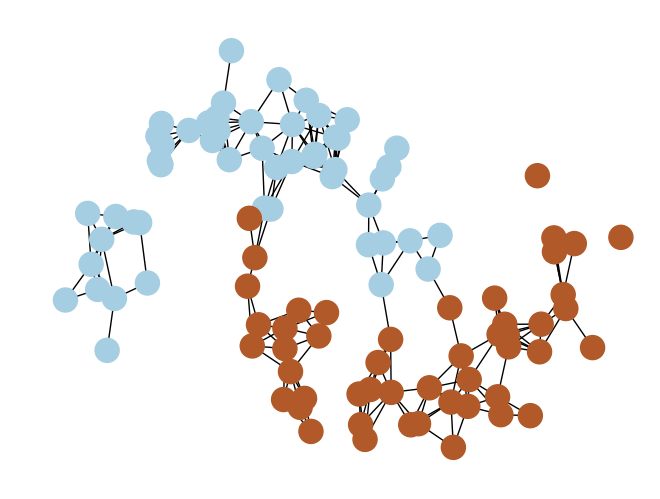

In [1]:
import numpy as np
from sklearn import svm
from sklearn.datasets import make_moons
import networkx as nx
import matplotlib.pyplot as plt

# Generate a synthetic graph dataset
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
G = nx.Graph()
for i, (x, label) in enumerate(zip(X, y)):
    G.add_node(i, pos=x, label=label)
for u in G.nodes():
    for v in G.nodes():
        if u < v and np.linalg.norm(G.nodes[u]['pos'] - G.nodes[v]['pos']) < 0.3:
            G.add_edge(u, v)

# Create node features and labels
node_features = np.array([G.nodes[i]['pos'] for i in G.nodes()])
labels = np.array([G.nodes[i]['label'] for i in G.nodes()])

# Create a Graph SVM model
model = svm.SVC(kernel='precomputed')

# Compute the graph kernel matrix
def compute_graph_kernel(graph):
    n = len(graph)
    kernel_matrix = np.zeros((n, n))
    for u in graph.nodes():
        for v in graph.nodes():
            if u <= v:
                similarity = np.exp(-np.linalg.norm(graph.nodes[u]['pos'] - graph.nodes[v]['pos']) ** 2)
                kernel_matrix[u, v] = similarity
                kernel_matrix[v, u] = similarity
    return kernel_matrix

graph_kernel = compute_graph_kernel(G)

# Train the model
model.fit(graph_kernel, labels)

# Make predictions
predictions = model.predict(graph_kernel)

# Plot the results
pos = {i: G.nodes[i]['pos'] for i in G.nodes()}
nx.draw(G, pos, node_color=predictions, cmap=plt.cm.Paired)
plt.show()
